In [1]:
library(datasets)

In [2]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


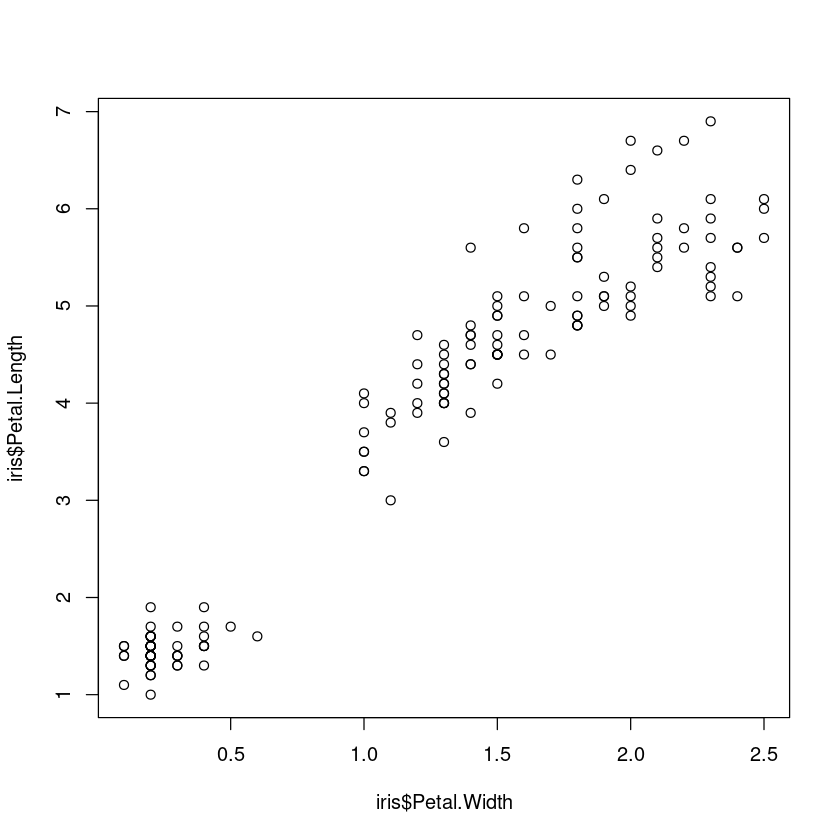

In [3]:
plot(x = iris$Petal.Width, y = iris$Petal.Length)

# 1. Tìm K

In [4]:
wss = (nrow(iris) - 1) * sum(apply(iris[, 3:4], 2, var))

wss

[1] 550.8953

* Chọn $K$ phù hợp

In [5]:
for (i in 1:6) {
    wss[i] = sum(kmeans(iris[,3:4], centers = i, nstart = 20)$withinss)
}

In [6]:
wss

[1] 550.89533  86.39022  31.37136  19.46599  13.91691  11.02515

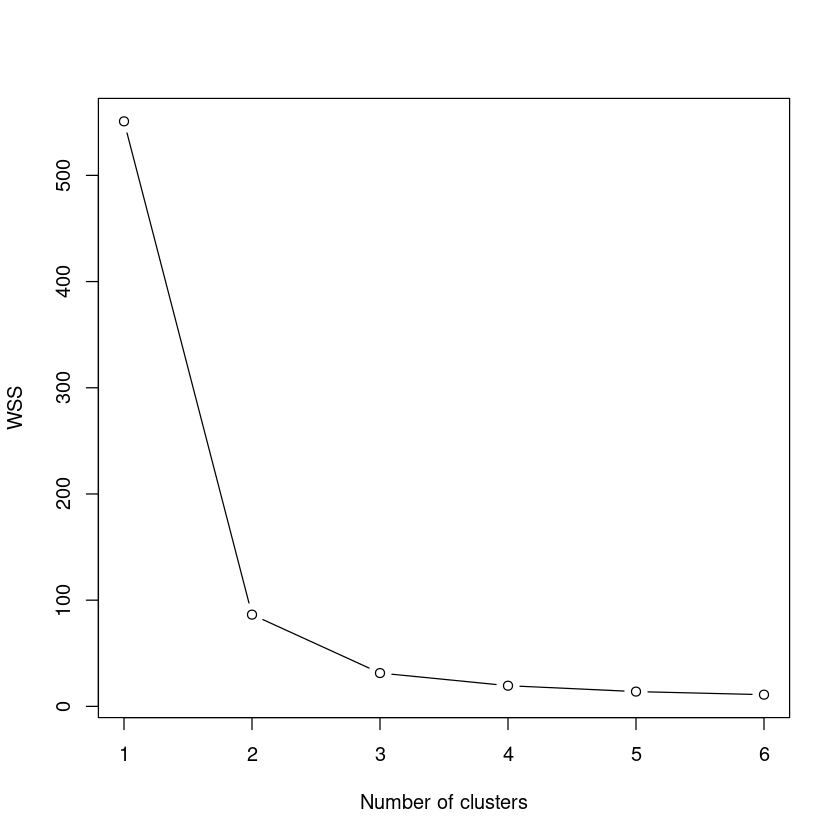

In [7]:
plot(1:6, wss, type = 'b',
     xlab = "Number of clusters",
     ylab = "WSS")

# 2. Build model

In [8]:
set.seed(20)
irisCluster = kmeans(iris[, 3:4], centers = 3, nstart = 20)

In [9]:
print(irisCluster)

K-means clustering with 3 clusters of sizes 52, 48, 50

Cluster means:
  Petal.Length Petal.Width
1     4.269231    1.342308
2     5.595833    2.037500
3     1.462000    0.246000

Clustering vector:
  [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
[112] 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
[149] 2 2

Within cluster sum of squares by cluster:
[1] 13.05769 16.29167  2.02200
 (between_SS / total_SS =  94.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


# 3. So sánh kết quả (nếu có)

In [10]:
irisCluster$centers

,Petal.Length,Petal.Width
1,4.269231,1.342308
2,5.595833,2.037500
3,1.462000,0.246000


In [11]:
compare = table(irisCluster$cluster, iris$Species)
compare

   
    setosa versicolor virginica
  1      0         48         4
  2      0          2        46
  3     50          0         0

# 4. Trực quan hóa kết quả

In [12]:
install.packages("factoextra")

Installing package into ‘/home/manhcuong/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rio’, ‘car’, ‘rstatix’, ‘FactoMineR’, ‘ggpubr’




In [14]:
library(factoextra)

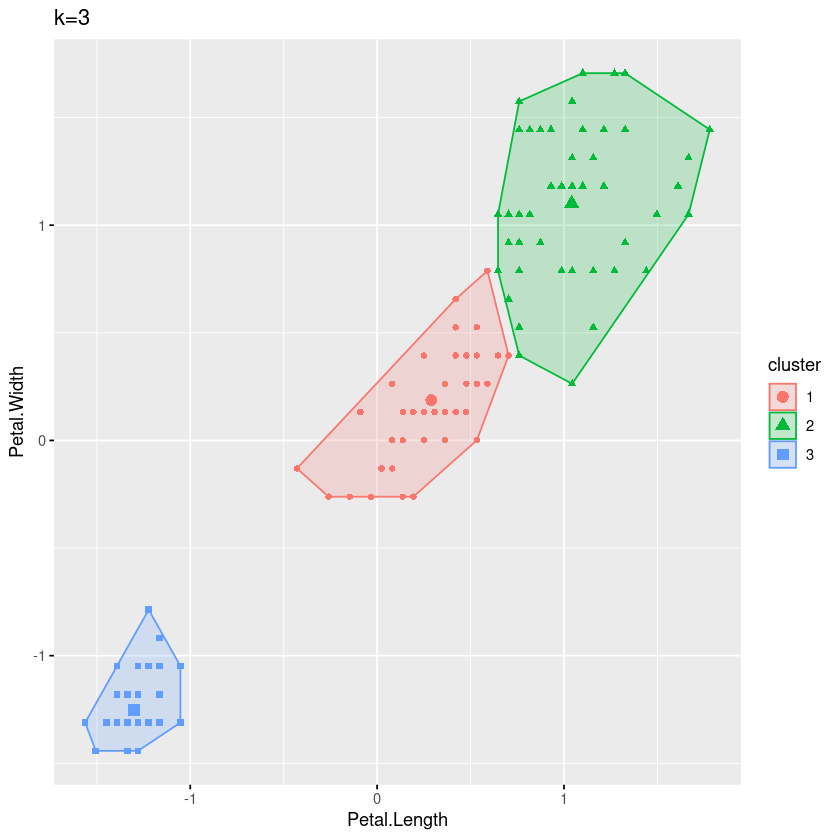

In [22]:
fviz_cluster(irisCluster, geom = 'point', data = iris[, 3:4]) +
             ggtitle("k=3")

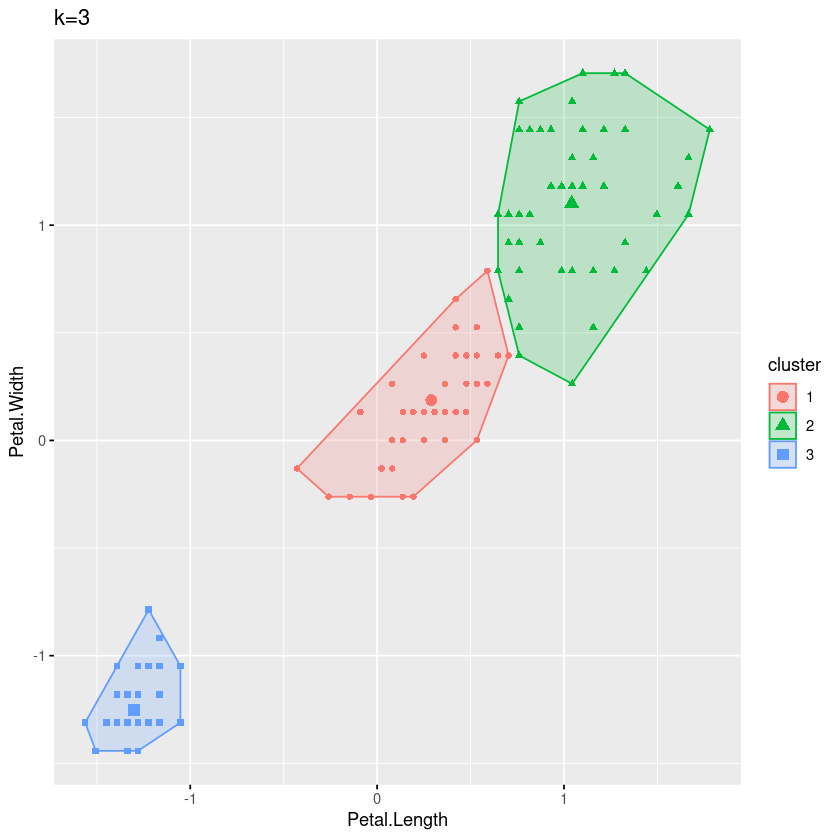

In [19]:
fviz_cluster(irisCluster, scand = FALSE, geom = 'point',  data = iris[, 3:4]) +
             ggtitle("k=3")

# 5. Dự đoán mẫu mới

In [23]:
newdata = data.frame(Petal.Length = c(1.45, 3.45, 5.25),
                     Petal.Width = c(0.25, 1.45, 2.35))

newdata

Petal.Length,Petal.Width
<dbl>,<dbl>
1.45,0.25
3.45,1.45
5.25,2.35


* Cách 1

In [24]:
predict.kmeans = function(object, newdata) {
    centers = object$centers
    n_centers = nrow(centers)
    dist_mat = as.matrix(dist(rbind(centers, newdata)))
    dist_mat = dist_mat[-seq(n_centers), seq(n_centers)]
    max.col(-dist_mat)
}

In [25]:
result = predict.kmeans(irisCluster, newdata)

In [26]:
result

[1] 3 1 2

* Cách 2

In [27]:
install.packages("clue")

Installing package into ‘/home/manhcuong/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [28]:
library("clue")

In [29]:
cl_predict(irisCluster, newdata = newdata)

Class ids:
[1] 3 1 2

# 6. Trực quan hóa kết quả

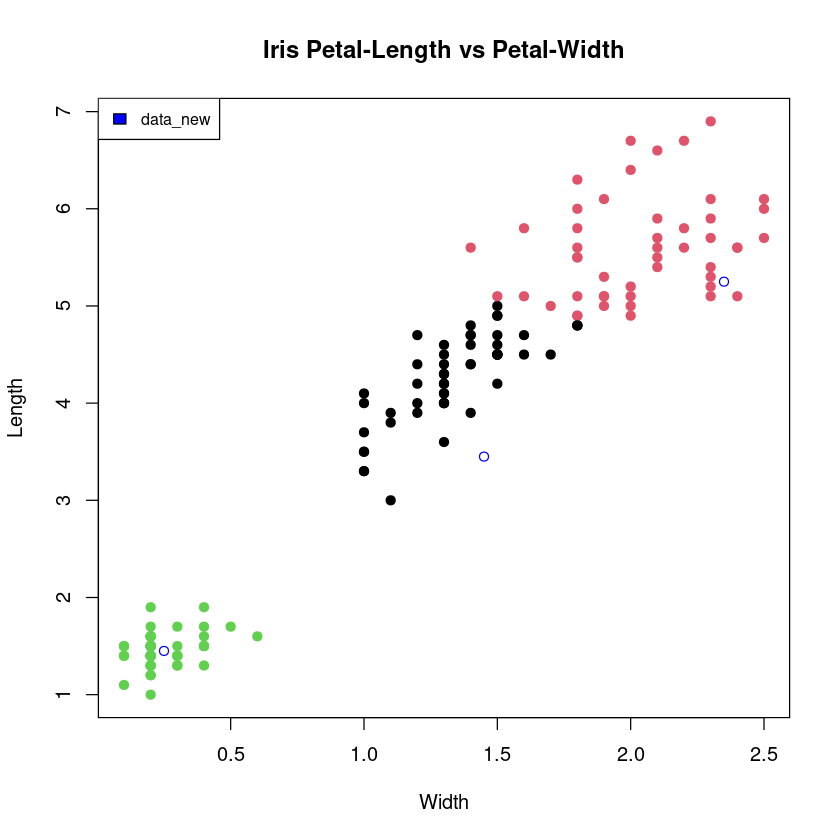

In [33]:
irisCluster$cluster = as.factor(irisCluster$cluster)
plot(x = iris$Petal.Width, y = iris$Petal.Length,
     xlab = "Width", ylab = "Length",
     main = "Iris Petal-Length vs Petal-Width",
     col = irisCluster$cluster, pch = 19)

lines(newdata$Petal.Width, newdata$Petal.Length, col = "blue", type = 'p')
legend("topleft", c('data_new'), cex = 0.8, fill = c('blue'))